The models and algorithms for doing cluster:
And used eleven algorithms.

1. K-means most widely known algorithm to do clusater (work as: minimize the 
variance.)
2. Cluster that the synthetic clustering dataset
3. Affinity Propagation ( work as: corresponding clusters.)
4. Agglomerative Clustering (work as: involves merging examples)
5. BIRCH (work as: involves constructing a tree structure or hierarchies)
6. DBSCAN (work as: finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.)
7. Mini-Batch K-Means (work as: not use the entire dataset, but faster for large datasets, and perhaps more robust to statistical noise)
8. Mean Shift (work as: mean shift procedure and can detect the dencity of data)
9. OPTICS (work as: creates an augmented ordering of the database representing its density-based clustering structure)
10. Spectral Clustering (work as: using matrics to drawn from linear algebra)
11. Gaussian Mixture Model (work as: a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests.)




In [72]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

In [73]:
# import database
df = pd.read_csv('drinks.csv')

In [74]:
df.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


Data processing

In [75]:
# drop the unvalued values
df.dropna

<bound method DataFrame.dropna of          country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
1        Albania             89              132             54   
2        Algeria             25                0             14   
3        Andorra            245              138            312   
4         Angola            217               57             45   
..           ...            ...              ...            ...   
188    Venezuela            333              100              3   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol  
0                             0.0  
1                             4.9  
2                             0.7  
3                

select the beer_servings and total_litres_of_pure_alcohol, will see the beer and the litres their relationships.

In [76]:
# select the columns, select the beer_servings and total_litres_of_pure_alcohol, will see its relationships.
X = df['beer_servings']
y = df['total_litres_of_pure_alcohol']

In [77]:
X.shape

(193,)

In [78]:
y.shape

(193,)

K-means   most widely known algorithm to do clusater  (work as: minimize the variance.)

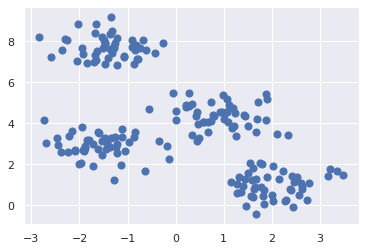

In [93]:
# use k-means to do cluster and visualization
from sklearn.datasets import make_blobs
X, y = [df['beer_servings'].values, df['total_litres_of_pure_alcohol'].values]
X, y_true = make_blobs(n_samples=193, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [94]:
# do a fit and prediction
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

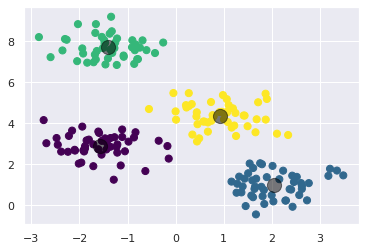

In [95]:
# and then visualization
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Cluster that the synthetic clustering dataset    

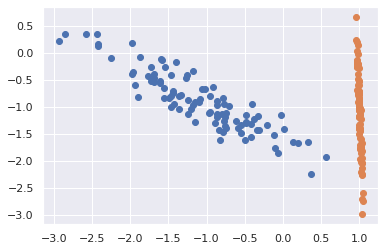

In [96]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = [df['beer_servings'].values, df['total_litres_of_pure_alcohol'].values]
X, y = make_classification(n_samples=193, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot

Affinity Propagation   ( work as: corresponding clusters.)

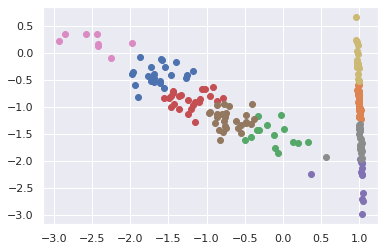

In [97]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define dataset
X, _ = [df['beer_servings'].values, df['total_litres_of_pure_alcohol'].values]
X, _ = make_classification(n_samples=193, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Agglomerative Clustering (work as: involves merging examples)

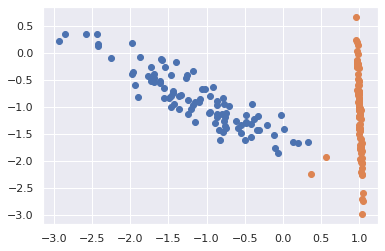

In [84]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X, _ = [df['beer_servings'].values, df['total_litres_of_pure_alcohol'].values]
X, _ = make_classification(n_samples=193, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

BIRCH    (work as: involves constructing a tree structure or hierarchies)

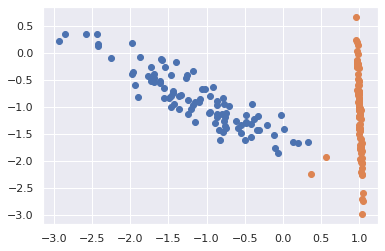

In [85]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
X, _ = [df['beer_servings'].values, df['total_litres_of_pure_alcohol'].values]
X, _ = make_classification(n_samples=193, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

DBSCAN (work as:  finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.)

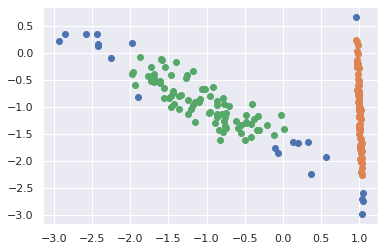

In [86]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X, _ = [df['beer_servings'].values, df['total_litres_of_pure_alcohol'].values]
X, _ = make_classification(n_samples=193, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Mini-Batch K-Means  (work as: not use the entire dataset, but faster for large datasets, and perhaps more robust to statistical noise)

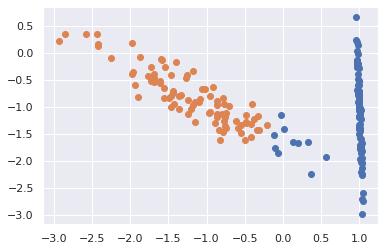

In [87]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
# define dataset
X, _ = [df['beer_servings'].values, df['total_litres_of_pure_alcohol'].values]
X, _ = make_classification(n_samples=193, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MiniBatchKMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Mean Shift (work as: mean shift procedure and can detect the dencity of data)

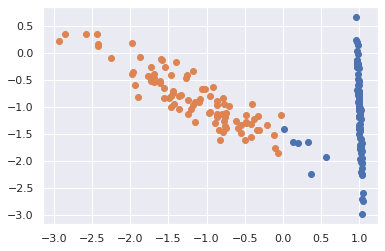

In [88]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
X, _ = [df['beer_servings'].values, df['total_litres_of_pure_alcohol'].values]
X, _ = make_classification(n_samples=193, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

OPTICS   (work as: creates an augmented ordering of the database representing its density-based clustering structure)

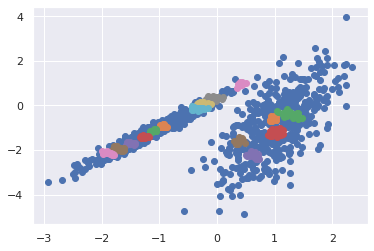

In [90]:
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# define dataset
X, _ = [df['beer_servings'].values, df['total_litres_of_pure_alcohol'].values]
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Spectral Clustering (work as: using matrics to drawn from linear algebra)

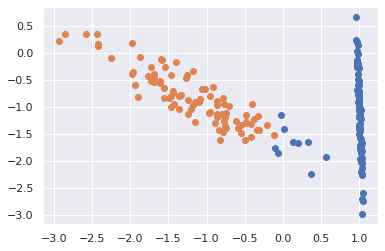

In [91]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
X, _ = [df['beer_servings'].values, df['total_litres_of_pure_alcohol'].values]
X, _ = make_classification(n_samples=193, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Gaussian Mixture Model (work as:  a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests.)

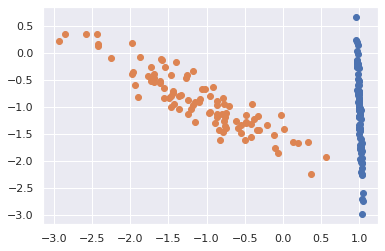

In [92]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset
X, _ = [df['beer_servings'].values, df['total_litres_of_pure_alcohol'].values]
X, _ = make_classification(n_samples=193, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

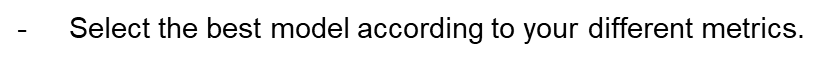

The best model:
K-means and Gaussian Mixture Model is the best models, especially K-means is very potable and suitable to do this work.
1) this dataset is many digital numbers, for "beer_servings" this column, we can see many digital numbers. but for "total_litres_of_pure_alcohol" this column, the number of the value is single digits, so if we use the variance way to diferrenciate this, maybe need to do some log.
2) for the perpose of the work, it is a value of numbers classification and do cluster. Not has other special characteristics or perpose. so the K-means is really portable and convinience, to do this work is enough. Gaussian probability distributionsuse in Gaussian Mixture Mode is also could suit for this work.

If we need to do some prediction, we can add the Spectral Clustering, this algorithm.

